In [1]:
from fdr_hacking.data_generation import *
from fdr_hacking.util import *
from fdr_hacking.statistical_testing import *
from itertools import product
import seaborn as sns

## simulation of data with autocorrelation

Notice that the correlation between variables in simulated data shows that the variables are correlated to the desired extent with previous variable

In [2]:
# np.random.seed(1234)
realworld_data = load_eg_realworld_data() # loading some example realworld data to have some sort of reference for parameters for beta distribution
n_observations = 200 # number of examples
n_sites = 5 # number of methylation sites
dependencies = True # whether I want dependencies or not; if false, no correlations are introduced
corr_coef_distribution = [(-0.40, -0.20), (0.70, 0.85)] # the introduced correlations will be equally represented from the specified ranges
sim_data = simulate_methyl_data(realworld_data, n_sites, n_observations, dependencies, corr_coef_distribution)
corr_sim_data = determine_correlation_matrix(sim_data)
print(corr_sim_data) # note that there is equal representation of the supplied correlation coefficient ranges and that the
# current variable is correlated with previous variable by a correlation that is specified through corr_coef_distribution

[[ 1.         -0.36177754 -0.02268957 -0.04092552 -0.0680267 ]
 [-0.36177754  1.         -0.17354684 -0.12107853 -0.10983725]
 [-0.02268957 -0.17354684  1.          0.76361059  0.71810395]
 [-0.04092552 -0.12107853  0.76361059  1.          0.86989425]
 [-0.0680267  -0.10983725  0.71810395  0.86989425  1.        ]]


In [3]:
n_sites = 10000 # number of methylation sites
dependencies = True # whether I want dependencies or not; if false, no correlations are introduced
# corr_coef_distribution = [(-0.79, -0.09), (-0.79, -0.09), (-0.08, 0.0), (0.0, 0.0), (0.0, 0.05),
#                           (0.06, 0.18), (0.18, 0.32), (0.18, 0.32), (0.32, 0.95), (0.32, 0.95)]
# corr_coef_distribution = [(-0.79, -0.09), (-0.08, 0.32), (0.32, 0.95)]
corr_coef_distribution = [(0.8, 0.95)]
sim_data = simulate_methyl_data(realworld_data, n_sites, n_observations, dependencies, corr_coef_distribution)
intervals = estimate_realworld_corrcoef_distribution(sim_data)
print(intervals)


[(-0.38, -0.09), (-0.09, -0.06), (-0.06, -0.04), (-0.04, -0.02), (-0.02, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.02), (0.02, 0.04), (0.04, 0.06), (0.06, 0.09), (0.09, 0.96)]


In [10]:
# copula-based simulation
n_sites = 10000 # number of methylation sites
dependencies = True # whether I want dependencies or not; if false, no correlations are introduced
# corr_coef_distribution = [(-0.79, -0.09), (-0.79, -0.09), (-0.08, 0.0), (0.0, 0.0), (0.0, 0.05),
#                           (0.06, 0.18), (0.18, 0.32), (0.18, 0.32), (0.32, 0.95), (0.32, 0.95)]
# corr_coef_distribution = [(-0.79, -0.09), (-0.08, 0.32), (0.32, 0.95)]
# corr_coef_distribution = [(0.6, 0.95)]
sim_data = simulate_methyl_data(realworld_data, n_sites, n_observations, dependencies)
intervals = estimate_realworld_corrcoef_distribution(sim_data)
print(intervals)


[(-1.0, -0.09), (-0.09, -0.06), (-0.06, -0.04), (-0.04, -0.02), (-0.02, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.02), (0.02, 0.04), (0.04, 0.06), (0.06, 0.09), (0.09, 1.0)]


In [4]:
real_data = sample_realworld_methyl_val(n_sites=n_sites, realworld_data=realworld_data)
real_intervals = estimate_realworld_corrcoef_distribution(real_data)
print(real_intervals)


[(-0.91, -0.21), (-0.21, -0.11), (-0.11, -0.03), (-0.03, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.03), (0.03, 0.1), (0.1, 0.16), (0.16, 0.23), (0.23, 0.31), (0.31, 0.43), (0.43, 0.97)]


In [5]:
real_corr_mat = determine_correlation_matrix(real_data)
real_adjacent_correlations = np.diag(real_corr_mat, k=-1)
quantiles = np.percentile(real_adjacent_correlations, np.arange(0, 101, 10))
intervals = [(round(quantiles[i], 2), round(quantiles[i + 1], 2)) for i in range(len(quantiles) - 1)]
print(intervals)


[(-0.58, -0.2), (-0.2, -0.11), (-0.11, -0.02), (-0.02, 0.03), (0.03, 0.1), (0.1, 0.16), (0.16, 0.22), (0.22, 0.32), (0.32, 0.44), (0.44, 0.95)]


/opt/homebrew/Caskroom/miniforge/base/envs/fdr_hacking/lib/python3.10/site-packages/fastcluster.py:26: FutureWarning: In the future `np.bool` will be defined as the corresponding NumPy scalar.
  from numpy import double, empty, array, ndarray, var, cov, dot, bool, \
/opt/homebrew/Caskroom/miniforge/base/envs/fdr_hacking/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/opt/homebrew/Caskroom/miniforge/base/envs/fdr_hacking/lib/python3.10/site-packages/fastcluster.py:26: FutureWarning: In the future `np.bool` will be defined as the corresponding NumPy scalar.
  from numpy import double, empty, array, ndarray, var, cov, dot, bool, \
/opt/homebrew/Caskroom/miniforge/base/envs/fdr_hacking/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


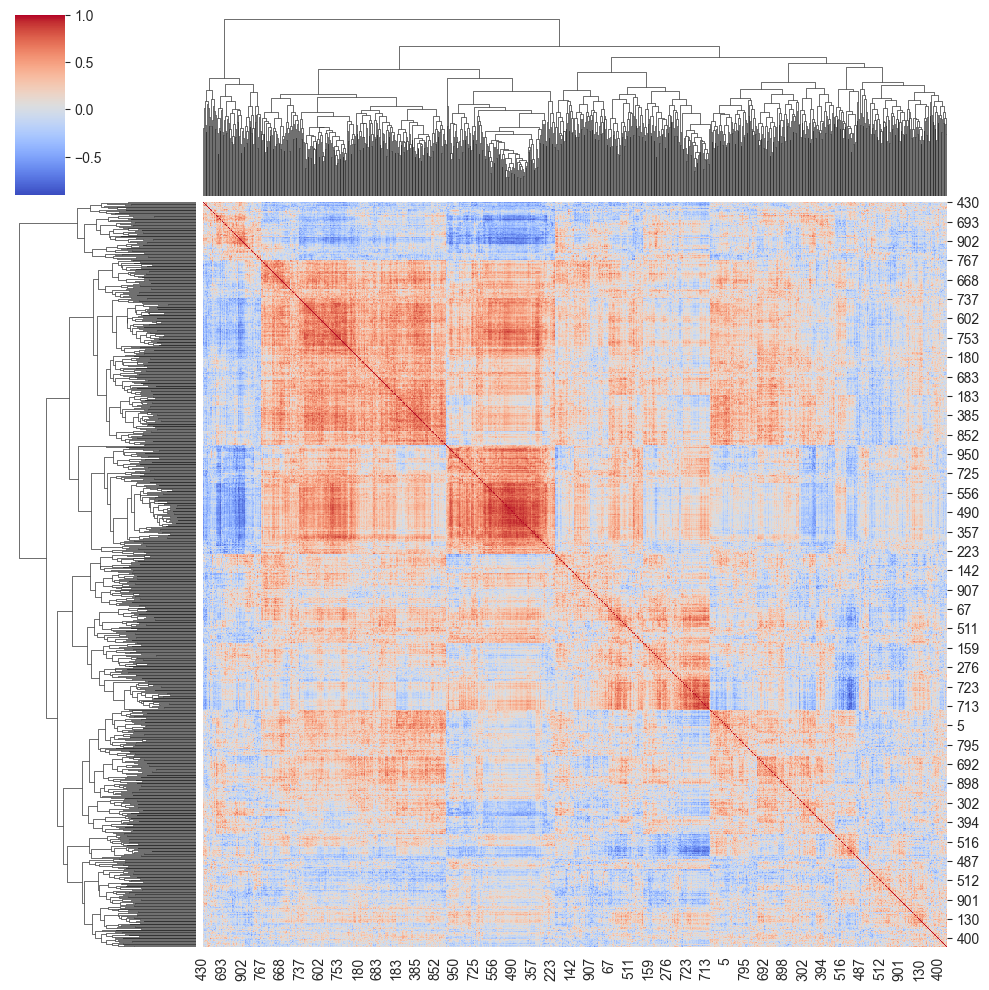

In [6]:
# import plotly.express as px
# fig = px.imshow(real_corr_mat)
# fig.show()
sns.clustermap(real_corr_mat, cmap='coolwarm', figsize=(10, 10))

In [10]:
sim_corr_mat = determine_correlation_matrix(sim_data)
sim_adjacent_correlations = np.diag(sim_corr_mat, k=-1)
sim_quantiles = np.percentile(sim_adjacent_correlations, np.arange(0, 101, 5))
sim_intervals = [(round(sim_quantiles[i], 2), round(sim_quantiles[i + 1], 2)) for i in range(len(sim_quantiles) - 1)]
print(sim_intervals)

[(0.69, 0.78), (0.78, 0.79), (0.79, 0.81), (0.81, 0.82), (0.82, 0.82), (0.82, 0.83), (0.83, 0.84), (0.84, 0.85), (0.85, 0.86), (0.86, 0.87), (0.87, 0.87), (0.87, 0.88), (0.88, 0.89), (0.89, 0.9), (0.9, 0.9), (0.9, 0.91), (0.91, 0.92), (0.92, 0.93), (0.93, 0.94), (0.94, 0.96)]


In [12]:
corr_coef_distribution = [(0.6, 0.95)]
corr_coefs = generate_n_correlation_coefficients(corr_coef_distribution, n_sites=10)
print(corr_coefs)

[0.8560465148122063, 0.9214807337042461, 0.681951569088265, 0.6163854592508944, 0.7539290947319893, 0.7518205179086843, 0.8123630296551977, 0.6454226879288512, 0.8853179762819878]


In [16]:
n_sites = 10000 # number of methylation sites
dependencies = True # whether I want dependencies or not; if false, no correlations are introduced
# corr_coef_distribution = [(-0.79, -0.09), (-0.79, -0.09), (-0.08, 0.0), (0.0, 0.0), (0.0, 0.05),
#                           (0.06, 0.18), (0.18, 0.32), (0.18, 0.32), (0.32, 0.95), (0.32, 0.95)]
# corr_coef_distribution = [(-0.79, -0.09), (-0.08, 0.32), (0.32, 0.95)]
corr_coef_distribution = [(0.8, 0.95)]
sim_data = simulate_methyl_data(realworld_data, n_sites, n_observations, dependencies, corr_coef_distribution)
intervals = estimate_realworld_corrcoef_distribution(sim_data)
print(intervals)


[(-0.38, -0.09), (-0.09, -0.06), (-0.06, -0.04), (-0.04, -0.02), (-0.02, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.02), (0.02, 0.04), (0.04, 0.06), (0.06, 0.09), (0.09, 0.96)]


Testing full pipeline

In [7]:
realworld_data = load_eg_realworld_data()
n_observations = 200 # number of examples
n_sites = 10000 # number of methylation sites
dependencies = False # whether I want dependencies or not; if false, no correlations are introduced
possible_test_types = ['t-test', 'limma', 'rank-sum']
possible_correction_types = ["bonferroni", "bh"]
sim_data_all = []
results = []
for i in range(100):
    sim_data = simulate_methyl_data(realworld_data, n_sites, n_observations, dependencies)
    method_combinations = product(possible_test_types, possible_correction_types)
    fdr_results = {}
    for comb in method_combinations:
        test_type, correction_type = comb
        num_significant = quantify_fdr(methyl_datamat=sim_data, group1_indices = list(range(100)), group2_indices = list(range(100,200)), test_type=test_type, method=correction_type, alpha=0.05)
        fdr_results[str(comb)] = num_significant
    sim_data_all.append(sim_data)
    results.append(fdr_results)
res_df = pd.DataFrame(results)

In [12]:
non_zero_res = res_df[res_df.any(axis=1)]
non_zero_res

,"('t-test', 'bonferroni')","('t-test', 'bh')","('limma', 'bonferroni')","('limma', 'bh')","('rank-sum', 'bonferroni')","('rank-sum', 'bh')"
65,1,1,1,1,1,1
82,1,1,1,1,1,1
94,1,1,1,1,0,0
99,0,0,0,0,1,1


In [2]:
realworld_data = load_eg_realworld_data()
n_observations = 200 # number of examples
n_sites = 10000
dependencies = True
possible_test_types = ['t-test', 'limma', 'rank-sum']
possible_correction_types = ["bonferroni", "bh"]
corr_coef_distribution = [(-0.85, -0.50), (-0.1, 0.1), (0.50, 0.85)]
sim_data_all = []
results = []
for i in range(100):
    sim_data = simulate_methyl_data(realworld_data, n_sites, n_observations, dependencies, corr_coef_distribution)
    method_combinations = product(possible_test_types, possible_correction_types)
    fdr_results = {}
    for comb in method_combinations:
        test_type, correction_type = comb
        num_significant = quantify_fdr(methyl_datamat=sim_data, group1_indices = list(range(100)), group2_indices = list(range(100,200)), test_type=test_type, method=correction_type, alpha=0.05)
        fdr_results[str(comb)] = num_significant
    sim_data_all.append(sim_data)
    results.append(fdr_results)
res_df = pd.DataFrame(results)

In [3]:
non_zero_res = res_df[res_df.any(axis=1)]
non_zero_res

,"('t-test', 'bonferroni')","('t-test', 'bh')","('limma', 'bonferroni')","('limma', 'bh')","('rank-sum', 'bonferroni')","('rank-sum', 'bh')"
26,1,2,1,2,1,1
52,0,0,0,0,1,1
61,1,1,0,0,1,1
76,1,1,1,1,1,1
92,1,1,1,1,1,1


In [4]:
realworld_data = load_eg_realworld_data()
n_observations = 200 # number of examples
n_sites = 10000
dependencies = True
possible_test_types = ['t-test', 'limma', 'rank-sum']
possible_correction_types = ["bonferroni", "bh"]
#corr_coef_distribution = [(-0.85, -0.50), (-0.1, 0.1), (0.50, 0.85)]
sim_data_all = []
results = []
for i in range(100):
    sim_data = simulate_methyl_data(realworld_data, n_sites, n_observations, dependencies)
    method_combinations = product(possible_test_types, possible_correction_types)
    fdr_results = {}
    for comb in method_combinations:
        test_type, correction_type = comb
        num_significant = quantify_fdr(methyl_datamat=sim_data, group1_indices = list(range(100)), group2_indices = list(range(100,200)), test_type=test_type, method=correction_type, alpha=0.05)
        fdr_results[str(comb)] = num_significant
    sim_data_all.append(sim_data)
    results.append(fdr_results)
res_df = pd.DataFrame(results)

In [ ]:
non_zero_res = res_df[res_df.any(axis=1)]
non_zero_res

In [5]:
generate_n_correlation_coefficients(corr_coef_distribution=[(0.50, 0.85)], n_sites=10)

[0.6937709993838429,
 0.7653686761419822,
 0.7791088546233651,
 0.8315265897170036,
 0.7469209344956553,
 0.5503291457559565,
 0.6077123849173152,
 0.7375372503901559,
 0.7194640249001167]

In [4]:
realworld_data = load_eg_realworld_data()
n_observations = 200 # number of examples
n_sites = 10000
dependencies = True
possible_test_types = ['t-test', 'limma', 'rank-sum']
possible_correction_types = ["bonferroni", "bh"]
corr_coef_distribution = [(-0.85, -0.50), (-0.1, 0.1), (0.70, 0.85)]
bin_size=3000

sim_data_all = []
results = []
for i in range(100):
    sim_data = simulate_methyl_data(realworld_data=realworld_data, n_sites=n_sites, n_observations=n_observations, 
                                dependencies=dependencies, corr_coef_distribution=corr_coef_distribution, bin_size=bin_size)
    method_combinations = product(possible_test_types, possible_correction_types)
    fdr_results = {}
    for comb in method_combinations:
        test_type, correction_type = comb
        num_significant = quantify_fdr(methyl_datamat=sim_data, group1_indices = list(range(100)), group2_indices = list(range(100,200)), test_type=test_type, method=correction_type, alpha=0.05)
        fdr_results[str(comb)] = num_significant
    sim_data_all.append(sim_data)
    results.append(fdr_results)
res_df = pd.DataFrame(results)

(200, 10000)
(200, 10000)
(200, 10000)
(200, 10000)
(200, 10000)
(200, 10000)
(200, 10000)
(200, 10000)
(200, 10000)
(200, 10000)
(200, 10000)
(200, 10000)
(200, 10000)
(200, 10000)
(200, 10000)
(200, 10000)
(200, 10000)
(200, 10000)
(200, 10000)
(200, 10000)
(200, 10000)
(200, 10000)
(200, 10000)
(200, 10000)
(200, 10000)
(200, 10000)
(200, 10000)
(200, 10000)
(200, 10000)
(200, 10000)
(200, 10000)
(200, 10000)
(200, 10000)
(200, 10000)
(200, 10000)
(200, 10000)
(200, 10000)
(200, 10000)
(200, 10000)
(200, 10000)
(200, 10000)
(200, 10000)
(200, 10000)
(200, 10000)
(200, 10000)
(200, 10000)
(200, 10000)
(200, 10000)
(200, 10000)
(200, 10000)
(200, 10000)
(200, 10000)
(200, 10000)
(200, 10000)
(200, 10000)
(200, 10000)
(200, 10000)
(200, 10000)
(200, 10000)
(200, 10000)
(200, 10000)
(200, 10000)
(200, 10000)
(200, 10000)
(200, 10000)
(200, 10000)
(200, 10000)
(200, 10000)
(200, 10000)
(200, 10000)
(200, 10000)
(200, 10000)
(200, 10000)
(200, 10000)
(200, 10000)
(200, 10000)
(200, 10000)

In [5]:
non_zero_res = res_df[res_df.any(axis=1)]
non_zero_res

,"('t-test', 'bonferroni')","('t-test', 'bh')","('limma', 'bonferroni')","('limma', 'bh')","('rank-sum', 'bonferroni')","('rank-sum', 'bh')"
62,0,78,0,49,0,73


In [2]:
realworld_data = load_eg_realworld_data()
n_observations = 200 # number of examples
n_sites = 1000
dependencies = True
possible_test_types = ['t-test', 'limma', 'rank-sum']
possible_correction_types = ["bonferroni", "bh"]
corr_coef_distribution = [(-0.85, -0.50), (-0.1, 0.1), (0.70, 0.85)]
bin_size=300
sim_data = simulate_methyl_data(realworld_data=realworld_data, n_sites=n_sites, n_observations=n_observations, 
                                dependencies=dependencies, corr_coef_distribution=corr_coef_distribution, bin_size=bin_size)
corr_sim_data = determine_correlation_matrix(sim_data)
# print(corr_sim_data)

[(-0.85, -0.5), (-0.1, 0.1), (0.7, 0.85)]


/opt/homebrew/Caskroom/miniforge/base/envs/fdr_hacking/lib/python3.10/site-packages/fastcluster.py:26: FutureWarning: In the future `np.bool` will be defined as the corresponding NumPy scalar.
  from numpy import double, empty, array, ndarray, var, cov, dot, bool, \
/opt/homebrew/Caskroom/miniforge/base/envs/fdr_hacking/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/opt/homebrew/Caskroom/miniforge/base/envs/fdr_hacking/lib/python3.10/site-packages/fastcluster.py:26: FutureWarning: In the future `np.bool` will be defined as the corresponding NumPy scalar.
  from numpy import double, empty, array, ndarray, var, cov, dot, bool, \
/opt/homebrew/Caskroom/miniforge/base/envs/fdr_hacking/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


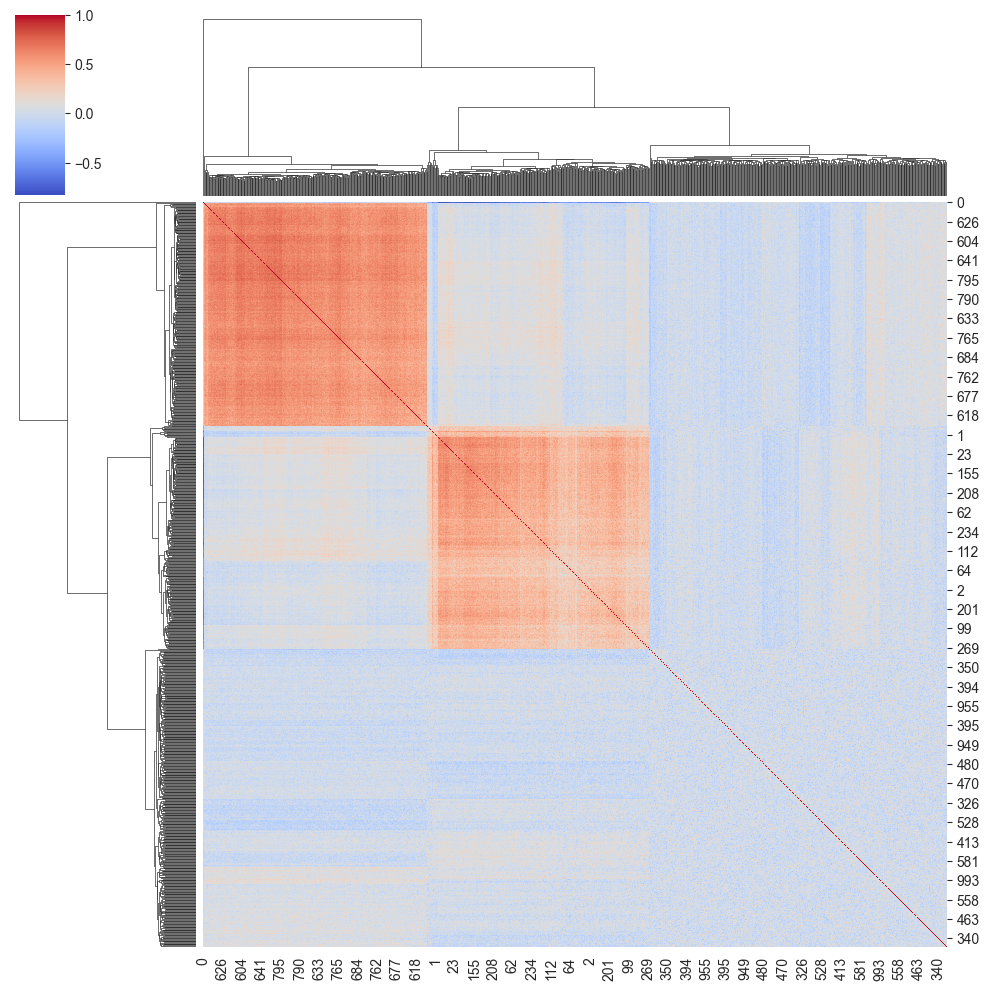

In [3]:
# import plotly.express as px
# fig = px.imshow(corr_sim_data)
# fig.show()
sns.clustermap(corr_sim_data, cmap='coolwarm', figsize=(10, 10))